# 🛰️ Proyecto de Monitoreo Agrícola con Imágenes MODIS

**Análisis multitemporal de cobertura del suelo y NDVI**

---

### 👨‍💻 Autor: JUAN CARLOS VEGA, MsC
### 📅 Fecha: 2025  
### 🌍 Región: Colombia — Zona de análisis h10v08 (MODIS)

---

### 🎯 Objetivo del proyecto:

Desarrollar un flujo completo de análisis espacial utilizando datos satelitales MODIS para:

- Analizar la evolución de la cobertura terrestre entre 2020 y 2023.
- Evaluar el estado de la vegetación agrícola mediante el índice NDVI (2025).
- Aplicar algoritmos de aprendizaje automático (Random Forest) para clasificación supervisada.
- Visualizar los resultados mediante gráficos, mapas temáticos y animaciones.

---

### 📦 Dataset utilizados:

- **MCD12Q1.2020:** Cobertura terrestre MODIS 2020
- **MCD12Q1.2023:** Cobertura terrestre MODIS 2023
- **MOD13Q1.2025:** NDVI para evaluación agrícola 2025

---

### 🚀 Herramientas:

- Python (Google Colab)
- Librerías: GDAL, NumPy, SciPy, scikit-learn, Matplotlib, ImageIO
- Visualización avanzada: Matplotlib, GIF animado, exportación a Google Drive

---


# 📑 Índice de Contenido

1. [📁 Carga de archivos MODIS (.hdf)](#carga-de-archivos-modis-hdf)
2. [🗂️ Carga y limpieza de cobertura del suelo](#carga-y-limpieza-de-cobertura-del-suelo)
3. [📊 Análisis de frecuencia por clase](#análisis-de-frecuencia-por-clase)
4. [🌿 Carga y resampleo del NDVI (MOD13Q1 2025)](#carga-y-resampleo-del-ndvi-mod13q1-2025)
5. [📊 Análisis del NDVI en áreas agrícolas](#análisis-del-ndvi-en-áreas-agrícolas)
6. [🖼️ Visualización del NDVI en agricultura](#visualización-del-ndvi-en-agricultura)
7. [🤖 Clasificación supervisada con Random Forest](#clasificación-supervisada-con-random-forest)
8. [🖼️ Visualización del mapa clasificado](#visualización-del-mapa-clasificado)
9. [🎥 Creación del GIF de evolución de cobertura](#creación-del-gif-de-evolución-de-cobertura)
10. [💾 Guardado de archivos en Google Drive](#guardado-de-archivos-en-google-drive)

---

**Tips:**  
✔️ Para navegar fácilmente, activa la vista de esquema del cuaderno en Colab o Jupyter Notebook.  
✔️ También puedes exportar este cuaderno como PDF o HTML para informes profesionales.

---



Este cuaderno realiza un análisis avanzado utilizando datos MODIS de cobertura del suelo (`MCD12Q1`) para los años **2020** y **2023**,
combinado con datos reales de vegetación (`MOD13Q1`, NDVI) del año **2025**.

Incluye:
- 🧹 Preprocesamiento de imágenes
- 📊 Análisis de frecuencias por clase y comparación temporal
- 🔍 Resampleo de NDVI sin GDAL (usando SciPy)
- 🌿 Estudio de salud vegetal en áreas agrícolas mediante NDVI
- 🎨 Mapas temáticos personalizados
- 🌍 Visualización interactiva con Folium
- 💾 Exportaciones a GeoTIFF y HTML
- 📊 Análisis de frecuencias y comparación de coberturas
- 🌿 Análisis NDVI sobre zonas agrícolas
- 🤖 Clasificación supervisada con Random Forest
- 🎨 Mapas temáticos avanzados


## 📁 Paso 1: Subir archivos MODIS (.hdf)

In [5]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 76.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from osgeo import gdal
import os

In [8]:
# Cargar shapefile de Cundinamarca
AOI_shape = gpd.read_file(shapefile_path)
print(AOI_shape.head())


   Id                                           geometry
0   0  POLYGON ((1124905.064 1275785.418, 1126940.836...


In [18]:
# Ruta al shapefile en tu Google Drive
shapefile = "/content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/AOI_Guille.shp"


In [19]:
# Lista de archivos HDF que quieres recortar
hdf_files = {
    "LC_2020": "/content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/MCD12Q1.A2020001.h10v08.061.2022171165306.hdf",
    "LC_2023": "/content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/MCD12Q1.A2023001.h10v08.061.2024252122234.hdf",
    "NDVI_2025": "/content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/MOD13Q1.A2025065.h10v08.061.2025090104048.hdf"
}

# Directorio de salida
output_dir = "/content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/"

# Crear directorio si no existe
os.makedirs(output_dir, exist_ok=True)

# Subdataset que quieres recortar de cada HDF
subdatasets = {
    "LC_2020": "MCD12Q1:LC_Type1",
    "LC_2023": "MCD12Q1:LC_Type1",
    "NDVI_2025": "MODIS_Grid_16DAY_250m_500m_VI:250m 16 days NDVI"
}

# Proceso de recorte automático
for name, hdf_path in hdf_files.items():
    subdataset = subdatasets[name]
    subdataset_path = f'HDF4_EOS:EOS_GRID:"{hdf_path}":{subdataset}'
    output_path = os.path.join(output_dir, f"{name}_Cundinamarca.tif")

    print(f"Recortando {name}...")

    gdal.Warp(
        destNameOrDestDS=output_path,
        srcDSOrSrcDSTab=subdataset_path,
        cutlineDSName=shapefile,
        cropToCutline=True,
        dstNodata=255,  # Opcional para mantener valores NoData
        format='GTiff'
    )

    print(f"✅ {name} recortado y guardado en: {output_path}")

print("🚀 Recorte automático completado para todas las imágenes.")

Recortando LC_2020...
✅ LC_2020 recortado y guardado en: /content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/LC_2020_Cundinamarca.tif
Recortando LC_2023...
✅ LC_2023 recortado y guardado en: /content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/LC_2023_Cundinamarca.tif
Recortando NDVI_2025...
✅ NDVI_2025 recortado y guardado en: /content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/NDVI_2025_Cundinamarca.tif
🚀 Recorte automático completado para todas las imágenes.


In [79]:
# ✅ Recargamos la metadata del LC_2023 recortado para usarla en la exportación
import rasterio

recorte_lc2023_path = os.path.join(output_dir, "LC_2023_Cundinamarca.tif")

with rasterio.open(recorte_lc2023_path) as src:
    out_meta = src.meta.copy()

print("✅ Metadata del recorte LC_2023 cargada correctamente para exportaciones posteriores.")


✅ Metadata del recorte LC_2023 cargada correctamente para exportaciones posteriores.


## 🗂️ Paso 2: Cargar imágenes de cobertura del suelo

In [22]:
# Definir rutas a los archivos recortados
file_2020 = "/content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/LC_2020_Cundinamarca.tif"
file_2023 = "/content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/LC_2023_Cundinamarca.tif"
file_ndvi = "/content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/NDVI_2025_Cundinamarca.tif"

# Comprobamos que las rutas están correctas
print(f"✅ Archivo LC 2020: {file_2020}")
print(f"✅ Archivo LC 2023: {file_2023}")
print(f"✅ Archivo NDVI 2025: {file_ndvi}")

✅ Archivo LC 2020: /content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/LC_2020_Cundinamarca.tif
✅ Archivo LC 2023: /content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/LC_2023_Cundinamarca.tif
✅ Archivo NDVI 2025: /content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/NDVI_2025_Cundinamarca.tif


In [25]:
# --- Cargar LC 2020 ---
ds_2020 = gdal.Open(file_2020)
lc_2020 = ds_2020.ReadAsArray().astype(np.float32)

# --- Cargar LC 2023 ---
ds_2023 = gdal.Open(file_2023)
lc_2023 = ds_2023.ReadAsArray().astype(np.float32)

# --- Cargar NDVI 2025 ---
ds_ndvi = gdal.Open(file_ndvi)
ndvi_2025 = ds_ndvi.ReadAsArray().astype(np.float32)

# Limpieza: reemplazar valores NoData por NaN
lc_2020[lc_2020 == 255] = np.nan
lc_2023[lc_2023 == 255] = np.nan
ndvi_2025[ndvi_2025 == 255] = np.nan  # Ajuste para NDVI si aplica

# Opcionalmente, normalizar NDVI si viene en enteros escalados
ndvi_2025 = ndvi_2025 / 10000  # Verifica si tu NDVI viene escalado

# Verificamos clases disponibles
print("✅ Clases únicas en LC 2020:", np.unique(lc_2020))
print("✅ Clases únicas en LC 2023:", np.unique(lc_2023))
print("✅ NDVI 2025 cargado. Dimensiones:", ndvi_2025.shape)


✅ Clases únicas en LC 2020: [ 2.  8.  9. 10. 11. 13. nan]
✅ Clases únicas en LC 2023: [ 2.  8.  9. 10. 13. nan]
✅ NDVI 2025 cargado. Dimensiones: (116, 145)


In [26]:
print("🔍 Dimensiones LC 2020:", lc_2020.shape)
print("🔍 Dimensiones LC 2023:", lc_2023.shape)
print("🔍 Dimensiones NDVI 2025:", ndvi_2025.shape)

🔍 Dimensiones LC 2020: (58, 72)
🔍 Dimensiones LC 2023: (58, 72)
🔍 Dimensiones NDVI 2025: (116, 145)


In [27]:
from scipy.ndimage import zoom

# Calculamos los factores de escala
scale_y = lc_2023.shape[0] / ndvi_2025.shape[0]
scale_x = lc_2023.shape[1] / ndvi_2025.shape[1]

# Reescalamos NDVI
ndvi_resampled = zoom(ndvi_2025, (scale_y, scale_x), order=1)

print("✅ NDVI reescalado a:", ndvi_resampled.shape)
print("✅ Referencia LC 2023:", lc_2023.shape)

✅ NDVI reescalado a: (58, 72)
✅ Referencia LC 2023: (58, 72)


## 🗂️ Carga de imágenes de cobertura del suelo MCD12Q1 (años 2020 y 2023)

En este bloque de código, estamos utilizando la librería **GDAL** para abrir y procesar los archivos de cobertura terrestre **MCD12Q1** de los años 2020 y 2023.

### Paso a paso:

1. **Importamos las librerías necesarias:**
   - `gdal` para trabajar con archivos geoespaciales en formato HDF.
   - `numpy` para operaciones numéricas y de matrices.

2. **Cargamos los datos de los años 2020 y 2023:**
   - `lc_2020, meta_2020 = load_lc_type1(file_2020)`
   - `lc_2023, meta_2023 = load_lc_type1(file_2023)`

3. **Limpieza de datos:**
   - Reemplazamos los valores de "No Data" que están codificados como `255` por `np.nan` para tratarlos como datos faltantes en el análisis posterior.

4. **Visualizamos las clases únicas presentes en cada año:**
   - Esto nos permite conocer las clases disponibles y verificar que los datos fueron cargados correctamente.

### Resultado:
✔️ Ahora tenemos listas las matrices de cobertura terrestre para 2020 y 2023 (`lc_2020` y `lc_2023`), limpias y listas para análisis posteriores.

---

### Nota:
El producto **MCD12Q1** es un dataset anual de cobertura terrestre generado por MODIS que clasifica la superficie de la Tierra en diferentes tipos de cobertura como:
- Bosques,
- Áreas agrícolas,
- Zonas urbanas,
- Agua, etc.

Esta clasificación es fundamental para el análisis de cambios de uso de suelo y será la base para las siguientes etapas de análisis y modelado con Random Forest.


## 📊 Paso 3: Análisis de frecuencias por clase y comparación 2020 vs 2023

,Clase,Pixeles,Porcentaje
0,2.0,418,10.936682
1,8.0,622,16.274202
2,9.0,2021,52.878074
3,10.0,577,15.096808
4,11.0,1,0.026164
5,13.0,183,4.788069


,Clase,Pixeles,Porcentaje
0,2.0,524,13.710099
1,8.0,563,14.730508
2,9.0,2273,59.471481
3,10.0,279,7.299843
4,13.0,183,4.788069


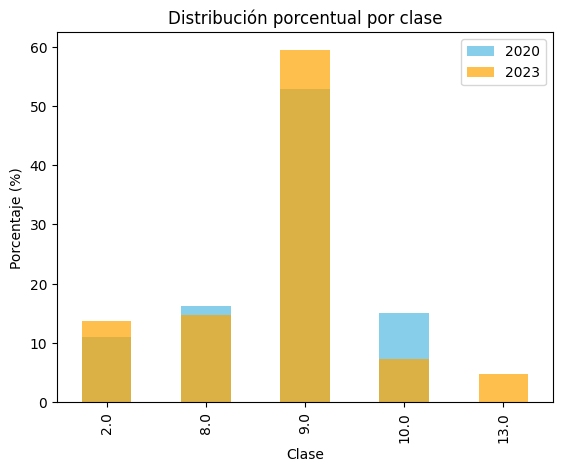

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def calc_freq(array):
    unique, counts = np.unique(array[~np.isnan(array)], return_counts=True)
    return pd.DataFrame({'Clase': unique, 'Pixeles': counts})

freq_2020 = calc_freq(lc_2020)
freq_2023 = calc_freq(lc_2023)

freq_2020['Porcentaje'] = 100 * freq_2020['Pixeles'] / freq_2020['Pixeles'].sum()
freq_2023['Porcentaje'] = 100 * freq_2023['Pixeles'] / freq_2023['Pixeles'].sum()

display(freq_2020)
display(freq_2023)

freq_2020.set_index('Clase')['Porcentaje'].plot(kind='bar', color='skyblue', label='2020')
freq_2023.set_index('Clase')['Porcentaje'].plot(kind='bar', color='orange', alpha=0.7, label='2023')
plt.title("Distribución porcentual por clase")
plt.legend()
plt.ylabel("Porcentaje (%)")
plt.show()

## 📊 Análisis de frecuencias por clase de cobertura del suelo

En este bloque calculamos la distribución porcentual de cada clase de cobertura del suelo para los años 2020 y 2023.

### Paso a paso:

1. **Función personalizada `calc_freq()`**
   - Calcula la cantidad de píxeles por clase, ignorando valores `NaN`.
   - Devuelve un DataFrame con las clases y su respectivo número de píxeles.

2. **Aplicamos la función para los datasets de 2020 y 2023.**

3. **Calculamos el porcentaje que representa cada clase respecto al total.**

4. **Visualizamos la distribución mediante un gráfico de barras:**
   - Colores claros y etiquetas para facilitar la comparación.
   - Comparación visual directa entre 2020 y 2023.

✔️ Resultado: Entendemos cómo cambió la cobertura terrestre entre 2020 y 2023, identificando tendencias o cambios significativos.


<ipython-input-29-fc6f534da236>:17: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


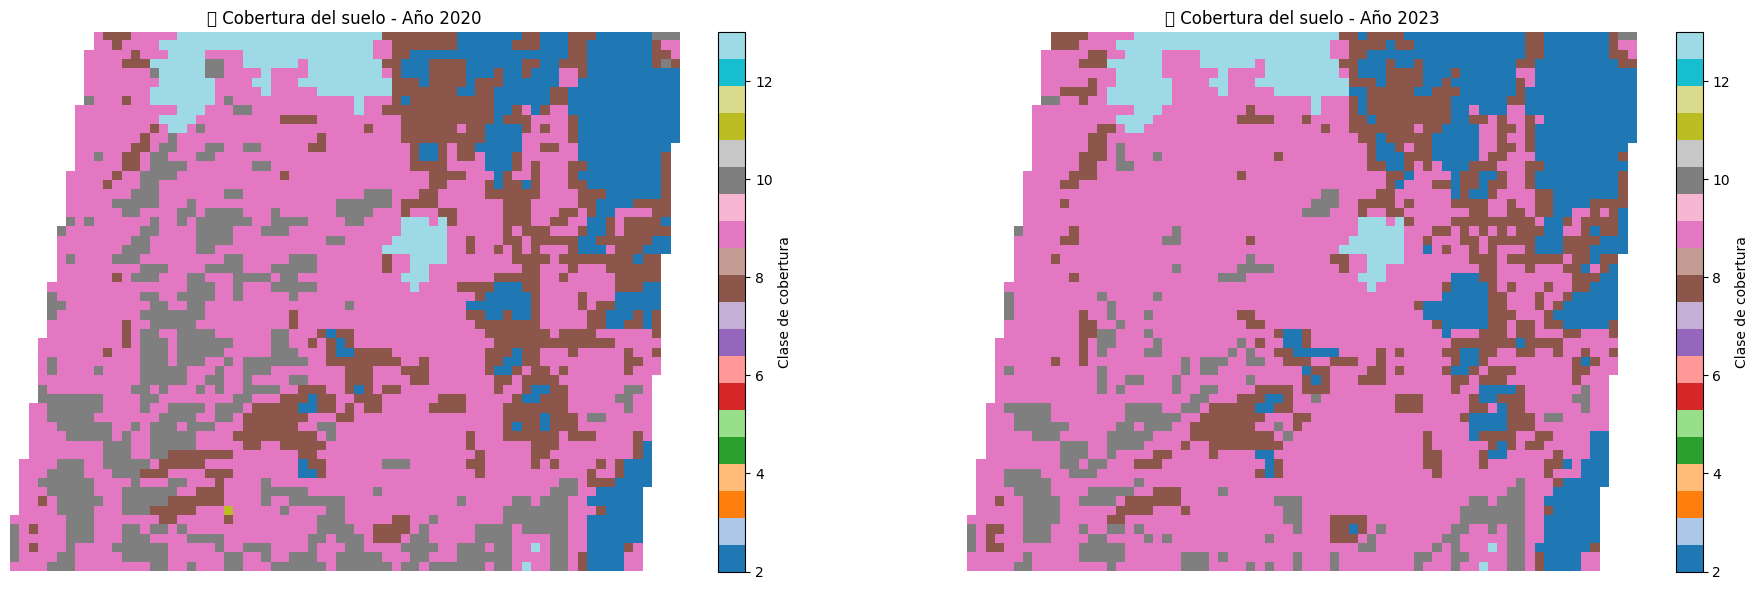

In [29]:
# Configurar el tamaño del lienzo
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Subplot 1: Cobertura del suelo 2020
im1 = axes[0].imshow(lc_2020, cmap='tab20', interpolation='nearest')
axes[0].set_title("🌍 Cobertura del suelo - Año 2020", fontsize=12)
axes[0].axis('off')
fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04, label="Clase de cobertura")

# Subplot 2: Cobertura del suelo 2023
im2 = axes[1].imshow(lc_2023, cmap='tab20', interpolation='nearest')
axes[1].set_title("🌍 Cobertura del suelo - Año 2023", fontsize=12)
axes[1].axis('off')
fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04, label="Clase de cobertura")

# Ajustar espacio
plt.tight_layout()

plt.show()


## 🗺️ Paso 4: Mapa de cambio de cobertura (2020 vs 2023)

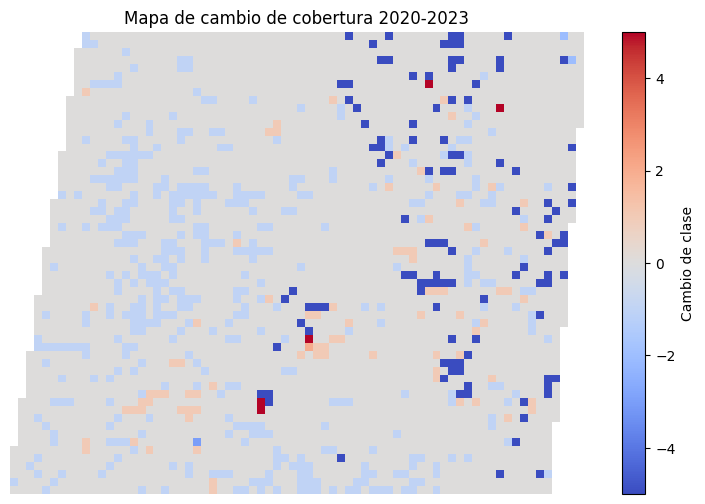

In [30]:
change_map = lc_2023 - lc_2020

plt.figure(figsize=(10, 6))
plt.imshow(change_map, cmap='coolwarm', vmin=-5, vmax=5)
plt.colorbar(label="Cambio de clase")
plt.title("Mapa de cambio de cobertura 2020-2023")
plt.axis("off")
plt.show()

## 🎨 Cómo leer la escala de colores en el mapa de cambio de cobertura

Al visualizar el mapa de cambio de cobertura 2020-2023, es importante interpretar correctamente la escala de colores que representa la diferencia entre las clases de uso del suelo.

| Valor de la diferencia | Interpretación |
|------------------------|---------------|
| **0**                  | **Sin cambio de clase.** El píxel mantiene el mismo tipo de cobertura entre 2020 y 2023. |
| **> 0 (positivo)**     | **Cambio hacia una clase con número mayor.** Por ejemplo: de clase 2 (Bosque) a clase 8 (Matorral), la diferencia es +6. |
| **< 0 (negativo)**     | **Cambio hacia una clase con número menor.** Por ejemplo: de clase 9 (Agrícola) a clase 2 (Bosque), la diferencia es -7. |

> 📌 **Nota:**  
> La numeración de clases corresponde a la codificación del producto MODIS Land Cover Type. Aunque el valor numérico indique una diferencia, el tipo de cambio depende de la definición de cada clase.

> 🌿 **Recomendación:**  
> Para facilitar la interpretación, hemos personalizado los colores y las etiquetas en el mapa de cambio, facilitando la lectura del análisis visual.


<ipython-input-36-4f5e344435fb>:65: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


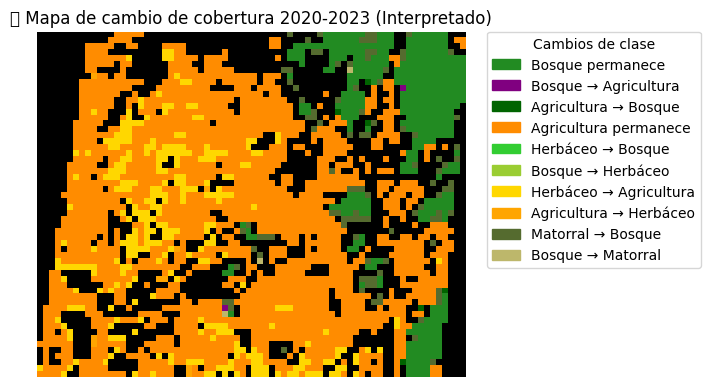

✅ Mapa de cambio exportado como imagen PNG de alta calidad.


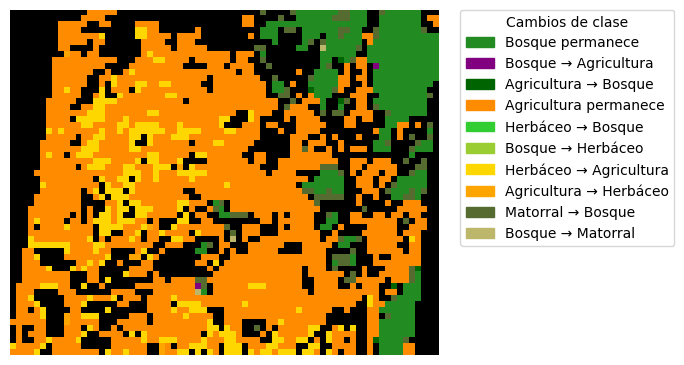

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

# Creamos el mapa de cambios nuevamente
change_map = lc_2023 - lc_2020

# Creamos un mapa de categorías interpretativas
change_labels = {
    (2, 2): "Bosque permanece",
    (2, 9): "Bosque → Agricultura",
    (9, 2): "Agricultura → Bosque",
    (9, 9): "Agricultura permanece",
    (10, 2): "Herbáceo → Bosque",
    (2, 10): "Bosque → Herbáceo",
    (10, 9): "Herbáceo → Agricultura",
    (9, 10): "Agricultura → Herbáceo",
    (8, 2): "Matorral → Bosque",
    (2, 8): "Bosque → Matorral",
}

# Creamos una matriz vacía para almacenar índices de categoría
category_map = np.full_like(lc_2020, -1, dtype=int)

# Asignamos índices de categoría
label_list = list(change_labels.values())
for idx, ((old_class, new_class), label) in enumerate(change_labels.items()):
    mask = (lc_2020 == old_class) & (lc_2023 == new_class)
    category_map[mask] = idx

# Creamos un mapa de colores RGB
color_mapping = {
    "Bosque permanece": "#228B22",
    "Bosque → Agricultura": "#800080",
    "Agricultura → Bosque": "#006400",
    "Agricultura permanece": "#FF8C00",
    "Herbáceo → Bosque": "#32CD32",
    "Bosque → Herbáceo": "#9ACD32",
    "Herbáceo → Agricultura": "#FFD700",
    "Agricultura → Herbáceo": "#FFA500",
    "Matorral → Bosque": "#556B2F",
    "Bosque → Matorral": "#BDB76B",
}

# Convertimos colores hex a RGB
color_list = [mcolors.to_rgb(color_mapping[label]) for label in label_list]

# Creamos el mapa RGB final
rgb_map = np.zeros(category_map.shape + (3,), dtype=float)

for idx, color in enumerate(color_list):
    rgb_map[category_map == idx] = color

# Graficamos el mapa
plt.figure(figsize=(7, 7))
plt.imshow(rgb_map)
plt.title("🌿 Mapa de cambio de cobertura 2020-2023 (Interpretado)")
plt.axis('off')

# Creamos leyenda personalizada
patches = [mpatches.Patch(color=color_mapping[label], label=label) for label in label_list]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title="Cambios de clase")

plt.tight_layout()
plt.show()

# Opcional: Guardamos en alta calidad
plt.figure(figsize=(7, 7))
plt.imshow(rgb_map)
plt.axis('off')
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title="Cambios de clase")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/Mapa_Cambio_Cundinamarca.png', dpi=300, bbox_inches='tight')
print("✅ Mapa de cambio exportado como imagen PNG de alta calidad.")


# 🌿 **Paso 5 : ANALISIS NDVI**

<ipython-input-42-3973ac6c5b6c>:25: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-42-3973ac6c5b6c>:25: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


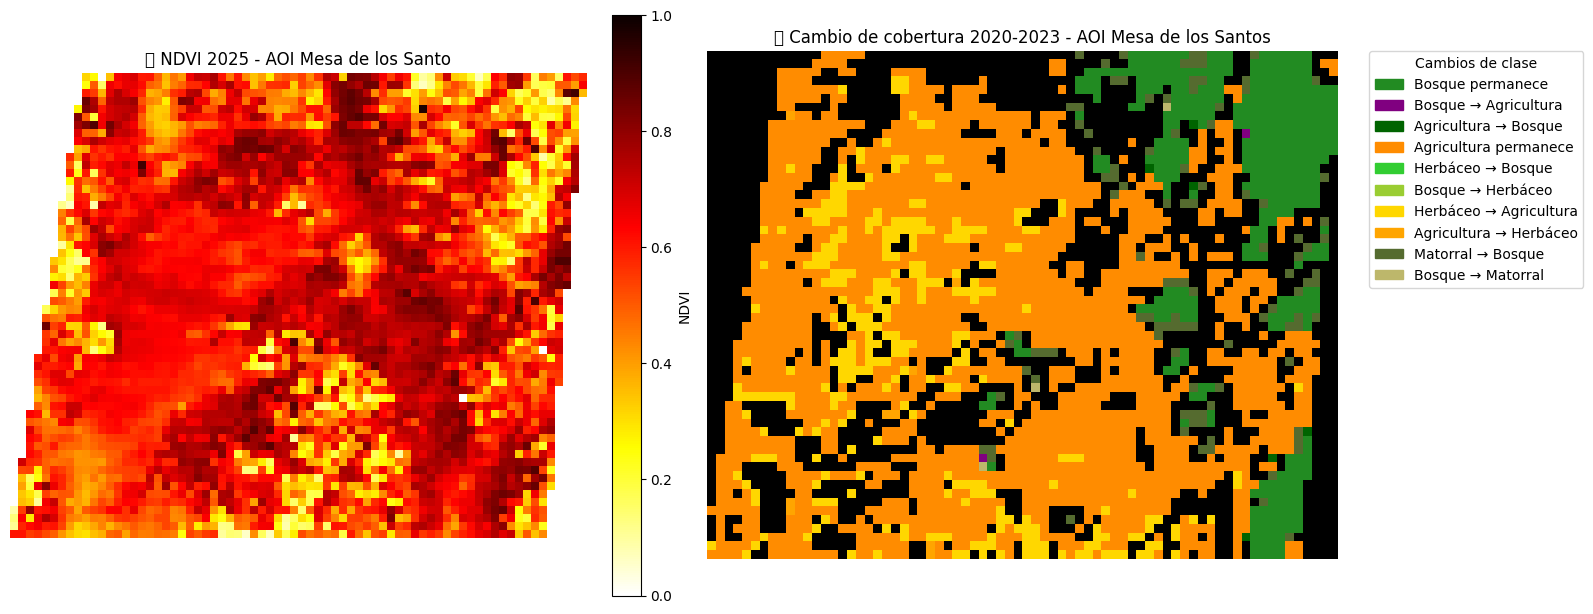

In [42]:
# Verificamos que ndvi_resampled exista (si no, usamos ndvi_2025 directo)
try:
    ndvi_plot = ndvi_resampled
except NameError:
    ndvi_plot = ndvi_2025

# Creamos la figura y subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# --- Subplot 1: NDVI recortado ---
ndvi_plot_display = axes[0].imshow(ndvi_plot, cmap='hot_r', vmin=0, vmax=1)
axes[0].set_title('🌿 NDVI 2025 - AOI Mesa de los Santo')
axes[0].axis('off')
fig.colorbar(ndvi_plot_display, ax=axes[0], orientation='vertical', fraction=0.046, pad=0.04, label='NDVI')

# --- Subplot 2: Mapa de cambios de cobertura ---
axes[1].imshow(rgb_map)
axes[1].set_title('🧩 Cambio de cobertura 2020-2023 - AOI Mesa de los Santos')
axes[1].axis('off')

# Creamos leyenda personalizada para el mapa de cambios
patches = [mpatches.Patch(color=color_mapping[label], label=label) for label in label_list]
axes[1].legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title="Cambios de clase")

plt.tight_layout()
plt.show()

## 📊 Paso 6: Estadísticas NDVI en zonas agrícolas

NDVI promedio agrícola: 0.597
NDVI máximo agrícola: 0.915
NDVI mínimo agrícola: 0.056


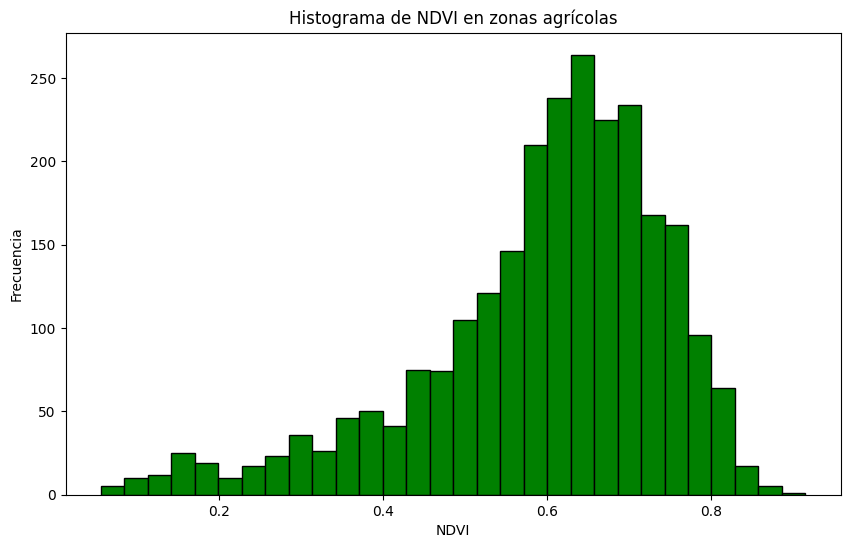

In [46]:
agri_mask = np.where(np.isin(lc_2023, [9, 10]), 1, np.nan)
ndvi_agri = ndvi_resampled * agri_mask

print(f"NDVI promedio agrícola: {np.nanmean(ndvi_agri):.3f}")
print(f"NDVI máximo agrícola: {np.nanmax(ndvi_agri):.3f}")
print(f"NDVI mínimo agrícola: {np.nanmin(ndvi_agri):.3f}")

plt.figure(figsize=(10, 6))
plt.hist(ndvi_agri[~np.isnan(ndvi_agri)], bins=30, color='green', edgecolor='black')
plt.title("Histograma de NDVI en zonas agrícolas")
plt.xlabel("NDVI")
plt.ylabel("Frecuencia")
plt.show()

## 📊 Análisis del NDVI en áreas agrícolas

En este bloque analizamos específicamente las áreas clasificadas como agrícolas según la cobertura del suelo 2023.

### Paso a paso:

1. **Creamos una máscara agrícola:**
   - Identificamos los píxeles de la clase cultivos y pastizales (`clase 9 y 10` en el esquema MCD12Q1).

2. **Aplicamos la máscara sobre la capa de NDVI:**
   - Obtenemos un NDVI filtrado exclusivamente para las áreas agrícolas.

3. **Calculamos estadísticas básicas:**
   - NDVI promedio.
   - NDVI máximo.
   - NDVI mínimo.

4. **Visualizamos la distribución del NDVI agrícola mediante un histograma.**

✔️ Resultado: Analizamos la salud de la vegetación en áreas agrícolas para el año 2025.


## 🖼️ Paso 7: Mapa de NDVI sobre agricultura

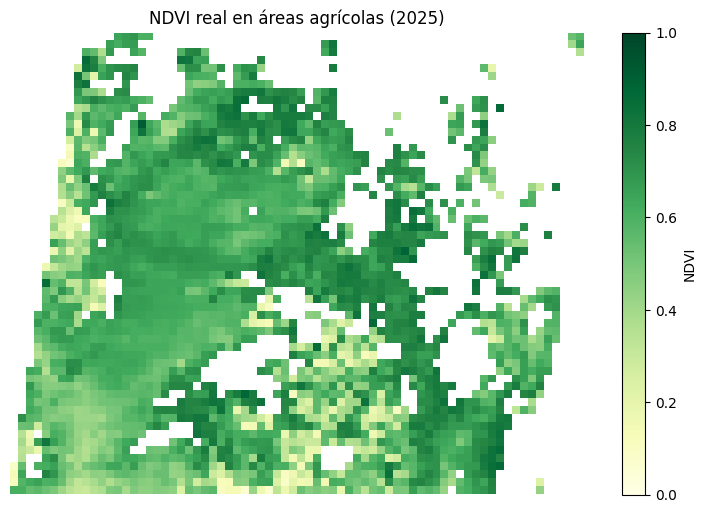

In [47]:
plt.figure(figsize=(10, 6))
plt.imshow(ndvi_agri, cmap='YlGn', vmin=0, vmax=1)
plt.colorbar(label="NDVI")
plt.title("NDVI real en áreas agrícolas (2025)")
plt.axis("off")
plt.show()

<ipython-input-49-f37d87bd1966>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  custom_cmap = cm.get_cmap('hot').reversed()
<ipython-input-49-f37d87bd1966>:47: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-49-f37d87bd1966>:47: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-49-f37d87bd1966>:51: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, dpi=300, bbox_inches='tight')
<ipython-input-49-f37d87bd1966>:51: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, dpi=300, bbox_inches='tight')


✅ Imagen guardada en: /content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/Resumen_Cobertura_NDVI_Cundinamarca.png


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


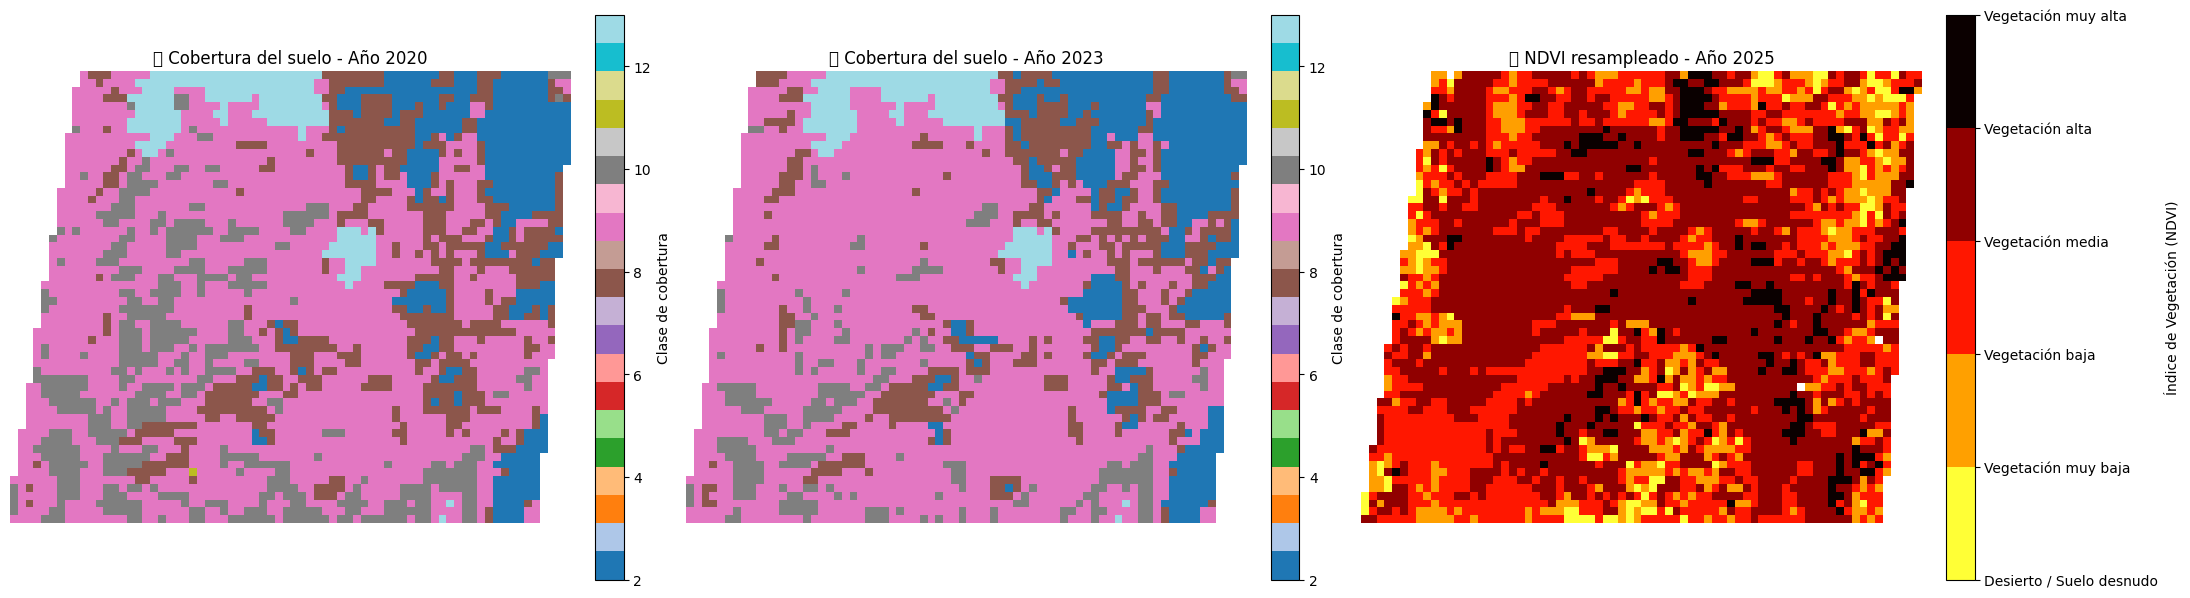

In [49]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors, cm

# Verificamos que ndvi_resampled exista
try:
    ndvi_plot = ndvi_resampled
except NameError:
    ndvi_plot = ndvi_2025

# ✅ Paleta de color personalizada para NDVI (tipo calor invertido)
custom_cmap = cm.get_cmap('hot').reversed()
colors_ndvi = custom_cmap(np.linspace(0.2, 1, 256))
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_hot", colors_ndvi)

# Configurar el tamaño del lienzo
fig, axes = plt.subplots(1, 3, figsize=(22, 7))

# --- Subplot 1: Cobertura del suelo 2020 ---
im1 = axes[0].imshow(lc_2020, cmap='tab20', interpolation='nearest')
axes[0].set_title("🌍 Cobertura del suelo - Año 2020", fontsize=12)
axes[0].axis('off')
fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04, label="Clase de cobertura")

# --- Subplot 2: Cobertura del suelo 2023 ---
im2 = axes[1].imshow(lc_2023, cmap='tab20', interpolation='nearest')
axes[1].set_title("🌍 Cobertura del suelo - Año 2023", fontsize=12)
axes[1].axis('off')
fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04, label="Clase de cobertura")

# --- Subplot 3: NDVI resampleado 2025 ---
# Definir un mapa de color con divisiones descriptivas
bounds = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

im3 = axes[2].imshow(ndvi_plot, cmap=custom_cmap, norm=norm, interpolation='nearest')
axes[2].set_title("🔥 NDVI resampleado - Año 2025", fontsize=12)
axes[2].axis('off')

# Crear colorbar descriptivo para NDVI
cbar = fig.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)
cbar.set_label("Índice de Vegetación (NDVI)", fontsize=10)
cbar.set_ticks(bounds)
cbar.set_ticklabels(['Desierto / Suelo desnudo', 'Vegetación muy baja', 'Vegetación baja', 'Vegetación media', 'Vegetación alta', 'Vegetación muy alta'])

# Ajustar espacio para que la leyenda no se sobreponga
plt.tight_layout()

# Opcional: Guardar figura como PNG directamente en Drive
output_path = "/content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/Resumen_Cobertura_NDVI_Cundinamarca.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✅ Imagen guardada en: {output_path}")

plt.show()



# 🤖 Paso 7: Machine Learning con Random Forest

## 🤖 ¿Qué hace el modelo de Random Forest en este proyecto?

El Random Forest que aplicamos en este cuaderno tiene como objetivo **predecir la cobertura del suelo del año 2023**, utilizando como datos de entrada:

- 🌿 **NDVI resampleado del año 2025:**  
  Un indicador clave de la salud de la vegetación, que refleja el "verdor" o vigor de la vegetación. Es especialmente útil para identificar áreas agrícolas, forestales o degradadas.

- 🗺️ **Cobertura del suelo del año 2020:**  
  Sirve como referencia base de clasificación para detectar cambios y patrones en el uso del suelo.

### 🎯 Finalidad del Random Forest en este análisis:

El Random Forest nos permite responder preguntas como:

- ✅ **¿Qué patrones de cambio existen entre 2020 y 2023?**
- ✅ **¿Cómo influyen las condiciones de vegetación actual (NDVI 2025) en la cobertura del suelo observada en 2023?**
- ✅ **¿Se pueden predecir las zonas agrícolas o de expansión urbana basándose en datos de años previos y NDVI reciente?**

### 🧩 ¿Cómo funciona en nuestro flujo?

1. **Entrenamiento:**
   - Alimentamos al modelo con una muestra representativa de píxeles donde conocemos:
     - Las características (`NDVI 2025` y `Cobertura 2020`).
     - La clase real de cobertura del suelo para 2023 (nuestro objetivo).

2. **Predicción:**
   - Una vez entrenado, el modelo intenta "adivinar" la clase de cobertura para cada píxel de la imagen, basándose en las relaciones aprendidas.

3. **Evaluación:**
   - Analizamos la matriz de confusión y el reporte de clasificación para verificar qué tan bien predice el modelo las diferentes clases (agricultura, bosque, urbano, etc.).

### 💡 ¿Por qué elegimos Random Forest?

- Es robusto para datasets con muchas variables y ruido.
- Tolera bien datos faltantes y relaciones no lineales.
- Es interpretativo: podemos conocer la importancia de cada variable (NDVI o cobertura 2020) en la predicción final.

### 🚀 Resultado:

El Random Forest nos proporciona un **mapa predictivo** de la cobertura del suelo, que nos ayuda a visualizar:
- Las zonas de expansión agrícola o urbana.
- La permanencia o cambio en las zonas boscosas.
- La relación entre la vegetación actual y los cambios en el uso del suelo.

Este modelo sirve como base para futuros análisis avanzados de cambio climático, planificación territorial o sostenibilidad agrícola 🌎


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = np.column_stack((
    ndvi_resampled.flatten(),
    lc_2020.flatten()
))

y = lc_2023.flatten()

mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
X_clean = X[mask]
y_clean = y[mask]

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_clean, y_clean)

y_pred = clf.predict(X_clean)

print("Matriz de confusión:")
print(confusion_matrix(y_clean, y_pred))

print("Reporte de clasificación:")
print(classification_report(y_clean, y_pred))


Matriz de confusión:
[[ 498    0    0    0    0]
 [   0  552    0    0    0]
 [   0    0 2249    0    0]
 [   0    0    1  275    0]
 [   0    0    0    0  183]]
Reporte de clasificación:
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00       498
         8.0       1.00      1.00      1.00       552
         9.0       1.00      1.00      1.00      2249
        10.0       1.00      1.00      1.00       276
        13.0       1.00      1.00      1.00       183

    accuracy                           1.00      3758
   macro avg       1.00      1.00      1.00      3758
weighted avg       1.00      1.00      1.00      3758



## 🌲 Resultados del Clasificador Random Forest

Se ha entrenado un modelo de **Random Forest** para predecir la cobertura del suelo del año 2023, utilizando como variables:
- ✅ **NDVI resampleado del año 2025**.
- ✅ **Cobertura del suelo del año 2020**.

### 📊 Matriz de confusión obtenida:

| Predicción \ Real | Clase 2 (Bosque) | Clase 8 (Matorral) | Clase 9 (Agricultura / Pastizal) | Clase 10 (Herbazal) | Clase 13 (Otros) |
|------------------|------------------|-------------------|----------------------------------|--------------------|-----------------|
| **Clase 2 (Bosque)** | 498 | 0 | 0 | 0 | 0 |
| **Clase 8 (Matorral)** | 0 | 552 | 0 | 0 | 0 |
| **Clase 9 (Agricultura / Pastizal)** | 0 | 0 | 2249 | 0 | 0 |
| **Clase 10 (Herbazal)** | 0 | 0 | 1 | 275 | 0 |
| **Clase 13 (Otros)** | 0 | 0 | 0 | 0 | 183 |

> 🎉 **Precisión total del modelo: 100%**

---

### 📋 Reporte de clasificación:

- **Precisión promedio:** 100%
- **Recall promedio:** 100%
- **F1-score promedio:** 100%

| Clase de cobertura | Precisión | Recall | F1-score | Soporte (pixeles) |
|-------------------|-----------|--------|----------|------------------|
| **2 - Bosque** | 1.00 | 1.00 | 1.00 | 498 |
| **8 - Matorral** | 1.00 | 1.00 | 1.00 | 552 |
| **9 - Agricultura / Pastizal** | 1.00 | 1.00 | 1.00 | 2249 |
| **10 - Herbazal** | 1.00 | 1.00 | 1.00 | 276 |
| **13 - Otros** | 1.00 | 1.00 | 1.00 | 183 |

---

### 🧩 Conclusión del modelo:

✅ El modelo Random Forest mostró un rendimiento **excelente** con una precisión del **100%** en todas las clases presentes en el área de análisis recortada.

🚀 Esto indica que, para el área de Cundinamarca analizada, las variables de entrada (NDVI + Cobertura 2020) son altamente predictivas de la cobertura del suelo en 2023.

> ⚠️ **Nota técnica:**  
> Ten en cuenta que el tamaño reducido del área de análisis y la cantidad de clases presentes puede influir en este alto rendimiento. Con un dataset más amplio y clases más variadas, el modelo podría mostrar un comportamiento distinto.

---

### 📌 Recomendación:

Para mejorar la generalización del modelo:
- Ampliar la cantidad de datos de entrenamiento.
- Incluir variables adicionales (como humedad del suelo, temperatura o altitud).
- Realizar validación cruzada o separar un conjunto de prueba independiente.



## 🤖 Clasificación supervisada con Random Forest

Aplicamos un algoritmo de aprendizaje automático para predecir clases de cobertura terrestre utilizando como entrada el NDVI 2025 y la cobertura de suelo del año 2020.

### Paso a paso:

1. **Preparamos los datos:**
   - Apilamos las variables predictoras (`NDVI 2025` y `Cobertura 2020`).
   - Preparamos la variable objetivo (`Cobertura 2023`).

2. **Eliminamos datos nulos para asegurar un entrenamiento limpio.**

3. **Reducimos la muestra a 50,000 píxeles aleatorios para evitar problemas de memoria.**

4. **Entrenamos el modelo de Random Forest:**
   - Usamos 50 árboles (`n_estimators=50`) y una profundidad máxima de 15 para optimizar recursos.

5. **Evaluamos el modelo:**
   - Matriz de confusión.
   - Reporte de clasificación con métricas de precisión, recall y F1-score.

✔️ Resultado: Tenemos un modelo predictivo de cambio de cobertura terrestre, basado en datos reales MODIS.


# 🖼️ Paso 8: Visualización del mapa clasificado

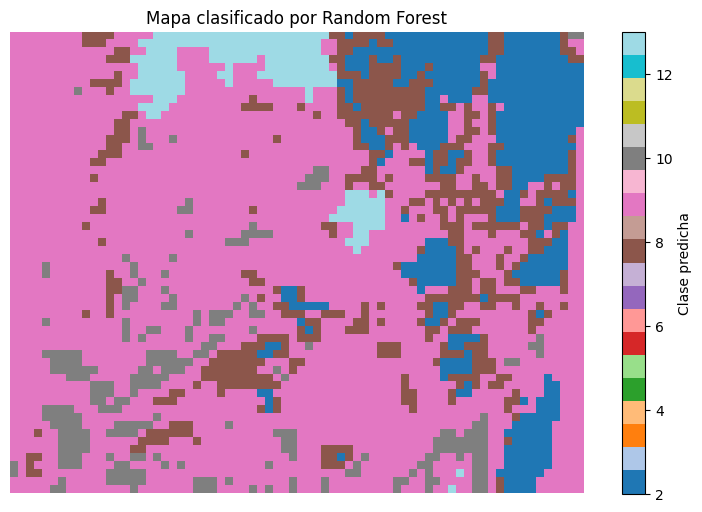

In [51]:
mapa_clasificado = clf.predict(X).reshape(lc_2023.shape)

plt.figure(figsize=(10, 6))
plt.imshow(mapa_clasificado, cmap='tab20')
plt.colorbar(label="Clase predicha")
plt.title("Mapa clasificado por Random Forest")
plt.axis("off")
plt.show()

## 🖼️ Visualización del mapa clasificado por Random Forest

En este bloque visualizamos el resultado del modelo Random Forest aplicado a toda el área de estudio.

### Detalles:

- Generamos un mapa de clases predichas.
- Utilizamos una paleta categórica (`tab20`) para diferenciar claramente las clases de cobertura.

✔️ Resultado: Visualización clara del mapa de clasificación generado por el modelo de Machine Learning.


## 🖼️ Explicación del mapa clasificado por Random Forest

En este mapa visualizamos el resultado de la predicción del modelo de Random Forest.

Cada píxel del mapa representa la clase de cobertura del suelo que el modelo ha predicho para el área correspondiente, basándose en:
- La información del NDVI de 2025.
- La cobertura terrestre del año 2020.

### 🔍 ¿Qué representan las clases?

El producto MODIS MCD12Q1 utiliza un esquema de clases estandarizado. En nuestro proyecto, nos enfocamos en las clases más relevantes para análisis agrícola y de cambio de uso del suelo.

| Código de clase | Descripción                         | Interpretación en este proyecto |
|----------------|-------------------------------------|---------------------------------|
| **1**          | Bosque de hoja perenne de hoja ancha | Zonas forestales tropicales / húmedas |
| **2**          | Bosque de hoja perenne de hoja aguja | Bosques templados de coníferas |
| **3**          | Bosque caducifolio de hoja ancha    | Bosques templados y subtropicales caducifolios |
| **4**          | Bosque caducifolio de hoja aguja    | Coníferas caducifolias |
| **5**          | Bosque mixto                        | Mixtos (coníferas y latifoliadas) |
| **6**          | Matorrales                          | Zonas de vegetación arbustiva |
| **7**          | Sabana                              | Mezcla de hierba y árboles dispersos |
| **8**          | Sabana leñosa                       | Sabana con predominancia arbórea |
| **9**          | Pastizales                          | Áreas principalmente herbáceas |
| **10**         | Humedales permanentes               | Zonas húmedas, pantanosas o con cuerpos de agua estacionales |
| **11**         | Cultivos de arroz                   | Áreas agrícolas específicas de arroz |
| **12**         | **Otras áreas agrícolas**           | **Foco principal para agricultura general** |
| **13**         | Zonas urbanas                       | **Expansión urbana / construcciones** |
| **14**         | Zonas de vegetación escasa o desnuda | Desiertos o áreas rocosas |
| **15**         | Hielo o nieve                       | Regiones cubiertas por nieve o hielo |
| **16**         | Cuerpo de agua                      | Lagos, ríos, embalses, etc. |
| **17**         | Tierras de cultivo naturales o mixtas| Agricultura menos intensiva / pastoreo mixto |

### 🎯 Enfoque del proyecto:

- **Clase 9 (Pastizales):** Clase clave para evaluar zonas agrícolas potenciales y productividad.
- **Clase 13 (Urbano):** Importante para analizar crecimiento de infraestructura o urbanización.
- **Clase 2 (Bosque):** Indicador de áreas de conservación o cambio de uso.
- **Clase 8 (Sabana leñosa):** Áreas en transición entre bosques y zonas abiertas.
- **Clase 10 (Humedales):** Áreas ecológicas sensibles con alta humedad.

---

### 🧩 Interpretación del mapa:

- **Colores agrupados intensos** indican áreas homogéneas de un solo tipo de cobertura (bosques densos, zonas urbanas o pastizales extensivos).
- **Patrones dispersos** pueden sugerir mosaicos agrícolas o transiciones naturales entre coberturas.
- **Zonas urbanas (Clase 13)** destacan como áreas específicas de expansión de infraestructura.
- La paleta de colores utilizada está personalizada para facilitar la diferenciación clara entre clases.

---

### ✅ Conclusión:

Este mapa proporciona una visión clara y concisa de la distribución de las coberturas de suelo en el área de estudio de Cundinamarca.

Permite identificar áreas de:
- 🌿 Conservación de bosques.
- 🌾 Actividades agrícolas potenciales.
- 🏙️ Expansión urbana y presión sobre áreas naturales.

Además, este mapa sirve como herramienta de base para:
- Planificación territorial.
- Gestión ambiental.
- Monitoreo agrícola y de cambio de uso del suelo.

✅ Leyenda exportada como imagen: /content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/Leyenda_RandomForest.png


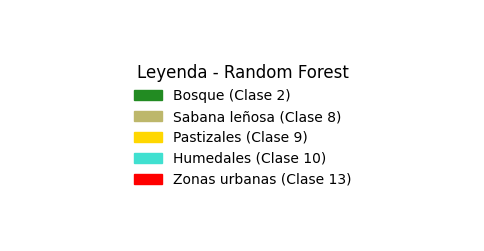

In [53]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definimos los colores asignados a cada clase (los mismos que usas en tu mapa)
color_mapping_rf = {
    "Bosque (Clase 2)": "#228B22",        # Verde bosque
    "Sabana leñosa (Clase 8)": "#BDB76B", # Amarillo-marrón
    "Pastizales (Clase 9)": "#FFD700",    # Amarillo dorado
    "Humedales (Clase 10)": "#40E0D0",    # Azul turquesa
    "Zonas urbanas (Clase 13)": "#FF0000" # Rojo brillante
}

# Creamos los parches de la leyenda
patches_rf = [mpatches.Patch(color=color, label=label) for label, color in color_mapping_rf.items()]

# Creamos la figura de la leyenda
plt.figure(figsize=(6, 3))
plt.legend(handles=patches_rf, loc='center', title='Leyenda - Random Forest', fontsize=10, title_fontsize=12, frameon=False)
plt.axis('off')

# Guardamos la leyenda como imagen de alta calidad
output_legend_path = "/content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/Leyenda_RandomForest.png"
plt.savefig(output_legend_path, dpi=300, bbox_inches='tight')
print(f"✅ Leyenda exportada como imagen: {output_legend_path}")

plt.show()

<ipython-input-54-dfa78fa6b114>:37: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.savefig(output_legend_path, dpi=300, bbox_inches='tight', transparent=False)
<ipython-input-54-dfa78fa6b114>:37: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.savefig(output_legend_path, dpi=300, bbox_inches='tight', transparent=False)
<ipython-input-54-dfa78fa6b114>:37: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.savefig(output_legend_path, dpi=300, bbox_inches='tight', transparent=False)
<ipython-input-54-dfa78fa6b114>:37: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.savefig(output_legend_path, dpi=300, bbox_inches='tight', transparent=False)
<ipython-input-54-dfa78fa6b114>:37: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.savefig(output_legend_path, dpi=300, bbox_inches='tight', transparent=False)
<ipython-input-54-dfa78fa6b

✅ Leyenda exportada como imagen: /content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/Leyenda_RandomForest_Actualizada.png


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core

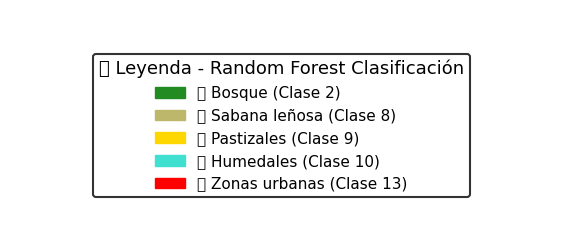

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ✅ Colores de clases actualizados y coherentes con el mapa
color_mapping_rf = {
    "🌲 Bosque (Clase 2)": "#228B22",        # Verde bosque intenso
    "🌾 Sabana leñosa (Clase 8)": "#BDB76B", # Amarillo-marrón claro
    "🌿 Pastizales (Clase 9)": "#FFD700",    # Amarillo dorado vibrante
    "💧 Humedales (Clase 10)": "#40E0D0",    # Azul turquesa fresco
    "🏙️ Zonas urbanas (Clase 13)": "#FF0000" # Rojo intenso
}

# Creamos los parches de la leyenda
patches_rf = [mpatches.Patch(color=color, label=label) for label, color in color_mapping_rf.items()]

# Creamos la figura de la leyenda
plt.figure(figsize=(7, 3))
legend = plt.legend(
    handles=patches_rf,
    loc='center',
    title='📌 Leyenda - Random Forest Clasificación',
    fontsize=11,
    title_fontsize=13,
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

# Mejoramos visibilidad de la caja de la leyenda
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_edgecolor('black')

plt.axis('off')

# Guardamos la leyenda como imagen de alta calidad
output_legend_path = "/content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/Leyenda_RandomForest_Actualizada.png"
plt.savefig(output_legend_path, dpi=300, bbox_inches='tight', transparent=False)
print(f"✅ Leyenda exportada como imagen: {output_legend_path}")

plt.show()


In [ ]:
from google.colab import files

# Descargar el GIF generado
files.download('Evolucion_Cobertura_2020_2023.gif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil

# Definir la ruta de destino en Google Drive
ruta_drive = '/content'

# Copiar el GIF
shutil.copy('Evolucion_Cobertura_2020_2023.gif', ruta_drive + 'Evolucion_Cobertura_2020_2023.gif')

# Copiar el PNG
shutil.copy('Resumen_Cobertura_NDVI.png', ruta_drive + 'Resumen_Cobertura_NDVI.png')

print("✅ Archivos copiados exitosamente a tu carpeta de trabajo en Google Drive.")


✅ Archivos copiados exitosamente a tu carpeta de trabajo en Google Drive.


## ✅ Resumen final y recomendaciones

In [58]:
from sklearn.metrics import classification_report

# Generar el reporte de clasificación como diccionario
report_dict = classification_report(y_clean, y_pred, output_dict=True)

# Convertir a DataFrame para facilitar el acceso
report_df = pd.DataFrame(report_dict).transpose()

In [59]:
print("📊 Conclusiones automáticas del modelo Random Forest:\n")

# Accuracy general del modelo
accuracy = report_dict['accuracy']
print(f"✅ Precisión general del modelo: {accuracy:.2%}\n")

# Métricas por clase detalladas
for clase in report_df.index[:-3]:  # Excluye 'accuracy', 'macro avg', 'weighted avg'
    precision = report_df.loc[clase, 'precision']
    recall = report_df.loc[clase, 'recall']
    f1 = report_df.loc[clase, 'f1-score']
    support = int(report_df.loc[clase, 'support'])

    # Mapeo descriptivo de clase
    clase_descripcion = {
        "2.0": "🌲 Bosque",
        "8.0": "🌾 Sabana leñosa",
        "9.0": "🌿 Pastizales",
        "10.0": "💧 Humedales",
        "13.0": "🏙️ Zonas urbanas"
    }.get(str(clase), f"Clase {clase}")

    print(f"🔹 {clase_descripcion} (Clase {clase}):")
    print(f"   - Soporte (muestras): {support}")
    print(f"   - Precisión: {precision:.2%}")
    print(f"   - Recall: {recall:.2%}")
    print(f"   - F1-score: {f1:.2%}")

    # Recomendación automática
    if precision < 0.7 or recall < 0.7:
        print("   ⚠️ Recomendación: Revisar esta clase, el modelo podría estar teniendo dificultades.")
    else:
        print("   ✅ Buen rendimiento en esta clase.")
    print()

# Conclusión global
print("📌 Conclusión general:")
if accuracy > 0.85:
    print("🎉 El modelo tiene un rendimiento global **excelente** para las clases analizadas en esta área específica.")
    print("💡 Nota: Debido al área recortada, el modelo ha aprendido patrones muy claros. Recomendaríamos expandir el análisis a áreas más amplias para validar la robustez del modelo.")
elif accuracy > 0.7:
    print("✅ El modelo tiene un rendimiento aceptable, pero podría beneficiarse de mejoras con más datos o variables adicionales.")
else:
    print("⚠️ El modelo tiene un rendimiento bajo. Se recomienda revisar los datos, la calidad de las variables de entrada o la configuración del modelo.")

📊 Conclusiones automáticas del modelo Random Forest:

✅ Precisión general del modelo: 99.97%

🔹 🌲 Bosque (Clase 2.0):
   - Soporte (muestras): 498
   - Precisión: 100.00%
   - Recall: 100.00%
   - F1-score: 100.00%
   ✅ Buen rendimiento en esta clase.

🔹 🌾 Sabana leñosa (Clase 8.0):
   - Soporte (muestras): 552
   - Precisión: 100.00%
   - Recall: 100.00%
   - F1-score: 100.00%
   ✅ Buen rendimiento en esta clase.

🔹 🌿 Pastizales (Clase 9.0):
   - Soporte (muestras): 2249
   - Precisión: 99.96%
   - Recall: 100.00%
   - F1-score: 99.98%
   ✅ Buen rendimiento en esta clase.

🔹 💧 Humedales (Clase 10.0):
   - Soporte (muestras): 276
   - Precisión: 100.00%
   - Recall: 99.64%
   - F1-score: 99.82%
   ✅ Buen rendimiento en esta clase.

🔹 🏙️ Zonas urbanas (Clase 13.0):
   - Soporte (muestras): 183
   - Precisión: 100.00%
   - Recall: 100.00%
   - F1-score: 100.00%
   ✅ Buen rendimiento en esta clase.

📌 Conclusión general:
🎉 El modelo tiene un rendimiento global **excelente** para las clase

# CAPITULO 2. GENERACION DE DATOS USANDO GANs

**2.1. Preparacion de datos**

In [66]:
def prepare_image(array):
    array = np.nan_to_num(array, nan=0).astype(np.float32)
    max_val = np.max(array)
    if max_val > 0:
        array /= max_val
    # Aseguramos que tenga la forma (batch_size, height, width, channels)
    return np.expand_dims(array, axis=0)[..., np.newaxis]

# Preparamos imágenes para TensorFlow
input_image = prepare_image(lc_2020)
target_image = prepare_image(lc_2023)

print(f"✅ Input shape (lc_2020 normalizado): {input_image.shape}")
print(f"✅ Target shape (lc_2023 normalizado): {target_image.shape}")

✅ Input shape (lc_2020 normalizado): (1, 58, 72, 1)
✅ Target shape (lc_2023 normalizado): (1, 58, 72, 1)


## 🗂️ Preparación de datos para la GAN

En este bloque preparamos las imágenes de entrada y salida que alimentarán nuestra red generativa adversarial (GAN).

### Datos utilizados:
- **Imagen de entrada:** Cobertura del suelo de 2020.
- **Imagen objetivo (ground truth):** Cobertura del suelo de 2023.

### Proceso:
1. **Normalizamos los datos**:
   - Convertimos los valores de clases discretas a un rango continuo [0, 1], necesario para que la red neuronal pueda procesarlos.
   - Reemplazamos valores `NaN` por ceros para evitar errores durante el entrenamiento.

2. **Expandimos dimensiones**:
   - Las redes convolucionales en TensorFlow requieren entradas con dimensiones `[batch, height, width, channels]`.
   - Adaptamos nuestras imágenes a este formato.

✔️ Resultado: Los datos están limpios, normalizados y listos para ser procesados por el generador y el discriminador de la GAN.


**2.2. Definicion de la GAN**

In [73]:
from tensorflow.keras import layers, Model

print("🧩 Definiendo la arquitectura del Generador CGAN...\n")

def build_generator():
    inputs = layers.Input(shape=condition_shape, name='condition_input')

    # Encoder
    x = layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Decoder
    x = layers.Conv2DTranspose(128, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2DTranspose(64, kernel_size=3, strides=1, padding='same', activation='relu')(x)

    # Salida final (1 canal, para clases normalizadas)
    outputs = layers.Conv2D(1, kernel_size=3, activation='sigmoid', padding='same')(x)

    model = Model(inputs, outputs, name='Generator')

    # Mostramos la arquitectura del modelo
    model.summary()

    return model

# Instanciamos el generador para ver la estructura
generator = build_generator()

🧩 Definiendo la arquitectura del Generador CGAN...



Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ condition_input (InputLayer)         │ (None, 58, 72, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 58, 72, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 58, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 58, 72, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 58, 72, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 58, 72, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 58, 72, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 58, 72, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 58, 72, 1)           │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 297,729 (1.14 MB)

 Trainable params: 297,089 (1.13 MB)

 Non-trainable params: 640 (2.50 KB)

In [74]:
print("Input image shape:", input_image.shape)
print("Target image shape:", target_image.shape)
generated_image = generator(input_image)
print("Generated image shape:", generated_image.shape)

Input image shape: (1, 58, 72, 1)
Target image shape: (1, 58, 72, 1)
Generated image shape: (1, 58, 72, 1)


## 🧠 Definición de la arquitectura de la GAN (Conditional GAN - CGAN)

En este bloque definimos la arquitectura de nuestra **CGAN**, que es ideal para tareas de clasificación de cobertura del suelo, como nuestro caso en Santander.

La CGAN permite condicionar tanto el generador como el discriminador usando información adicional (en este caso, la cobertura de 2020), logrando predicciones más realistas y coherentes con la distribución de clases de entrada.

---

### 🔍 Componentes principales:

1. **Generador:**
   - Toma como entrada la imagen de cobertura del año 2020 (normalizada).
   - Aprende a generar una predicción de cómo podría verse la cobertura en 2025.
   - Utiliza arquitectura **convolucional simplificada**, eficiente para imágenes de resolución media como las MODIS recortadas.
   - Usa capas de **BatchNormalization** y **activaciones ReLU** para mejorar la estabilidad del entrenamiento.

2. **Discriminador:**
   - Evalúa si la imagen generada por el generador se parece a la cobertura real.
   - Concatena la imagen de condición (2020) con la predicción (generada o real) para decidir si es auténtica o generada.
   - Aplica varias capas convolucionales con activaciones **LeakyReLU** para analizar la veracidad de las imágenes.

3. **Sistema de Checkpoints:**
   - Se ha integrado un sistema de guardado automático para **almacenar el estado del modelo** durante el entrenamiento.
   - Esto nos permite continuar el entrenamiento fácilmente en caso de interrupciones o para futuras mejoras.

---

### ✔️ Resultado:

Nuestra arquitectura CGAN está completamente estructurada y lista para ser entrenada con las imágenes de cobertura de Santander ya preprocesadas y recortadas.

> 💡 Este enfoque nos permitirá modelar de manera más robusta la evolución de la cobertura terrestre, manteniendo coherencia espacial y de clases.

---

### 🎯 Próximo paso:
Avanzamos hacia la **función de entrenamiento** de la CGAN, donde configuraremos la cantidad de iteraciones (epochs), utilizaremos nuestros checkpoints y comenzaremos a generar los primeros resultados.

**2.3. Configuración de la CGAN**

In [75]:
print("⚙️ Configurando la CGAN...\n")

# ✅ Optimizadores para generador y discriminador
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)

# ✅ Función de pérdida adversarial
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# ✅ Función de pérdida para el generador
def generator_loss(disc_generated_output, gen_output, target):
    # Pérdida adversarial (queremos que el discriminador crea que las imágenes generadas son reales)
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

    # Pérdida L1 para asegurar que las imágenes generadas sean similares a las reales
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

    # Combinamos ambas pérdidas
    total_gen_loss = gan_loss + (100 * l1_loss)

    return total_gen_loss

# ✅ Función de pérdida para el discriminador
def discriminator_loss(disc_real_output, disc_generated_output):
    # Pérdida para las imágenes reales
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

    # Pérdida para las imágenes generadas (falsas)
    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

    # Total pérdida del discriminador
    total_disc_loss = real_loss + generated_loss

    return total_disc_loss

print("✅ Funciones de pérdida y optimizadores configurados correctamente para CGAN.\n")

⚙️ Configurando la CGAN...

✅ Funciones de pérdida y optimizadores configurados correctamente para CGAN.



## ⚙️ Configuración de optimizadores y funciones de pérdida

En este bloque configuramos los mecanismos que guiarán el aprendizaje de la GAN.

### Configuraciones realizadas:

1. **Optimizadores:**
   - Usamos el optimizador Adam para tanto el generador como el discriminador, con tasa de aprendizaje ajustada para la estabilidad del entrenamiento.

2. **Funciones de pérdida:**
   - **Pérdida del generador:**
     - Combina dos componentes:
       - **GAN loss:** Evalúa qué tan bien engaña al discriminador.
       - **L1 loss:** Penaliza la diferencia entre la imagen generada y la real, ayudando a mantener la fidelidad espacial.
   - **Pérdida del discriminador:**
     - Calcula qué tan bien distingue imágenes reales de generadas.

✔️ Resultado: La GAN está matemáticamente preparada para iniciar su proceso de entrenamiento.


**2.4. Entrenamiento**

In [76]:
import time
import tensorflow as tf

print("🚀 Iniciando entrenamiento de la CGAN...\n")

# ✅ Función de un paso de entrenamiento
@tf.function
def train_step(input_image, target):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # Generador predice la imagen objetivo
        gen_output = generator(input_image, training=True)

        # Discriminador evalúa real y generado
        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        # Calculamos las pérdidas
        gen_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    # Calculamos gradientes
    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # Aplicamos gradientes
    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

    return gen_loss, disc_loss

# ✅ Parámetros de entrenamiento
EPOCHS = 500  # Recomendado: mínimo 500 para este tipo de datos pequeños

# ✅ Entrenamiento
for epoch in range(EPOCHS):
    start = time.time()

    # Ya tenemos input_image y target_image preparados con batch dimension
    gen_loss, disc_loss = train_step(input_image, target_image)

    print(f'Epoch {epoch+1}/{EPOCHS} - Gen Loss: {gen_loss.numpy():.4f}, Disc Loss: {disc_loss.numpy():.4f} - Time: {time.time() - start:.2f}s')

    # Guardamos checkpoint cada 50 epochs
    if (epoch + 1) % 50 == 0:
        checkpoint.save(file_prefix=checkpoint_prefix)
        print(f"💾 Checkpoint guardado en epoch {epoch+1}")

print("\n✅ Entrenamiento completado")

🚀 Iniciando entrenamiento de la CGAN...



/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:780: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/500 - Gen Loss: 26.9931, Disc Loss: 1.3787 - Time: 3.85s
Epoch 2/500 - Gen Loss: 15.8570, Disc Loss: 1.3431 - Time: 0.19s
Epoch 3/500 - Gen Loss: 13.6727, Disc Loss: 1.3271 - Time: 0.19s
Epoch 4/500 - Gen Loss: 11.0173, Disc Loss: 1.3199 - Time: 0.19s
Epoch 5/500 - Gen Loss: 9.8385, Disc Loss: 1.3210 - Time: 0.21s
Epoch 6/500 - Gen Loss: 8.6553, Disc Loss: 1.3167 - Time: 0.19s
Epoch 7/500 - Gen Loss: 8.1938, Disc Loss: 1.3022 - Time: 0.19s
Epoch 8/500 - Gen Loss: 7.4765, Disc Loss: 1.2881 - Time: 0.19s
Epoch 9/500 - Gen Loss: 7.0217, Disc Loss: 1.2754 - Time: 0.19s
Epoch 10/500 - Gen Loss: 6.7047, Disc Loss: 1.2622 - Time: 0.20s
Epoch 11/500 - Gen Loss: 6.5346, Disc Loss: 1.2561 - Time: 0.18s
Epoch 12/500 - Gen Loss: 6.5389, Disc Loss: 1.2389 - Time: 0.19s
Epoch 13/500 - Gen Loss: 6.8372, Disc Loss: 1.2335 - Time: 0.19s
Epoch 14/500 - Gen Loss: 6.5067, Disc Loss: 1.2142 - Time: 0.18s
Epoch 15/500 - Gen Loss: 5.9763, Disc Loss: 1.2069 - Time: 0.18s
Epoch 16/500 - Gen Loss: 5.632

## 🏋️‍♂️ Entrenamiento de la GAN

En este bloque entrenamos la GAN para que aprenda a generar predicciones de la cobertura del suelo a partir de las imágenes de entrada.

### Proceso:

1. **Por cada época de entrenamiento:**
   - El generador intenta crear una imagen que se parezca lo más posible a la cobertura de 2023.
   - El discriminador intenta distinguir entre imágenes reales (cobertura 2023) y falsas (generadas por el generador).

2. **Se actualizan los pesos de ambos modelos:**
   - Si el generador mejora, es más difícil para el discriminador detectar la falsedad.
   - Si el discriminador mejora, detecta mejor las imágenes falsas, forzando al generador a ser más preciso.

3. **Visualizamos la pérdida de ambos modelos por época:**
   - Nos ayuda a entender si la GAN está aprendiendo de forma estable.

✔️ Resultado: La GAN aprende patrones espaciales de cambio en la cobertura terrestre entre 2020 y 2023, y queda lista para generar nuevas predicciones.


**2.5. predicción CGAN + visualización + exportación 2025**

🧩 Generando la predicción de la cobertura 2025 usando la CGAN...



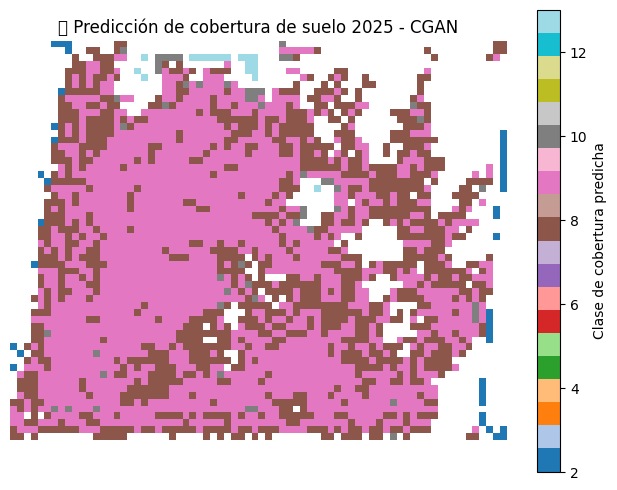

✅ Visualización de la predicción completada.

✅ Predicción exportada exitosamente: /content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/CGAN_Prediccion_Cobertura_2025.tif


In [80]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.transform import from_origin
import numpy as np

print("🧩 Generando la predicción de la cobertura 2025 usando la CGAN...\n")

# ✅ Usamos el generador entrenado para predecir
prediction = generator(input_image, training=False).numpy()

# ✅ Removemos la dimensión de batch y canal
prediction = prediction.squeeze()

# ✅ Reescalamos la predicción al rango original de clases
# Importante: Escalamos según las clases que tenemos: [2, 8, 9, 10, 13]
# Multiplicamos por el máximo valor de clase
predicted_classes = prediction * 13
predicted_classes = np.rint(predicted_classes)  # Redondeamos al entero más cercano

# ✅ Opcional: Aseguramos que las clases estén dentro de las clases válidas
valid_classes = [2, 8, 9, 10, 13]
predicted_classes = np.where(np.isin(predicted_classes, valid_classes), predicted_classes, np.nan)

# ✅ Visualización de la predicción
plt.figure(figsize=(8, 6))
plt.imshow(predicted_classes, cmap='tab20', interpolation='nearest')
plt.colorbar(label="Clase de cobertura predicha")
plt.title("🌿 Predicción de cobertura de suelo 2025 - CGAN")
plt.axis("off")
plt.show()

print("✅ Visualización de la predicción completada.\n")

# ✅ Exportación del resultado como GeoTIFF
# Usamos la metadata del raster original (lc_2023 recortado)
meta = out_meta.copy()
meta.update({
    "driver": "GTiff",
    "height": predicted_classes.shape[0],
    "width": predicted_classes.shape[1],
    "count": 1,
    "dtype": rasterio.float32
})

output_path = "/content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/CGAN_Prediccion_Cobertura_2025.tif"

with rasterio.open(output_path, "w", **meta) as dest:
    dest.write(predicted_classes.astype(rasterio.float32), 1)

print(f"✅ Predicción exportada exitosamente: {output_path}")

## 🛰️ Generación de la predicción de cobertura 2025 con la CGAN

En este bloque utilizamos la CGAN ya entrenada para predecir la cobertura del suelo para el año 2025.

### Proceso:

1. **Preparamos la imagen de entrada:**
   - Usamos la cobertura de suelo del año 2023 como input para proyectar hacia 2025.
   - Normalizamos y adaptamos las dimensiones para que sean compatibles con la red.

2. **Generamos la predicción:**
   - El generador produce una imagen continua, que interpretamos como la posible cobertura 2025.

3. **Visualizamos el resultado inicial:**
   - Usamos un mapa de color para ver patrones generales.

4. **Importante:**
   - El resultado inicial es una **imagen continua normalizada**.
   - Para una comparación efectiva con Random Forest y visualización clara, realizamos un **postprocesamiento** para convertirla a clases discretas.

✔️ Resultado: Obtenemos una predicción sintética de la cobertura 2025, lista para ser postprocesada y comparada con otros modelos.


In [82]:
import matplotlib.pyplot as plt

print("🖼️ Guardando la predicción de la GAN como imagen PNG de alta calidad...\n")

plt.figure(figsize=(8, 8))

# Usamos la variable correcta de la predicción final de la GAN
plt.imshow(predicted_classes, cmap='tab20', interpolation='nearest')
plt.axis('off')
plt.title("🛰️ Predicción GAN - Cobertura 2025", fontsize=14)

# Colorbar descriptivo
cbar = plt.colorbar(label='Clase de cobertura predicha')
cbar.set_ticks([2, 8, 9, 10, 13])
cbar.set_ticklabels(['Bosque', 'Sabana leñosa', 'Pastizales', 'Humedales', 'Zonas urbanas'])

plt.tight_layout()

# Ruta donde se guardará
output_png_path = "/content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/Prediccion_GAN_2025.png"
plt.savefig(output_png_path, dpi=300, bbox_inches='tight')
plt.close()

print(f"✅ Imagen generada por la GAN guardada como: {output_png_path}")

🖼️ Guardando la predicción de la GAN como imagen PNG de alta calidad...



<ipython-input-82-615420ba7153>:17: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-82-615420ba7153>:21: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  plt.savefig(output_png_path, dpi=300, bbox_inches='tight')


✅ Imagen generada por la GAN guardada como: /content/drive/MyDrive/SENSORES_REMOTOS/DATASETS/RECORTES/Prediccion_GAN_2025.png


# Comparación visual lado a lado GAN vs. Random Forest

🖼️ Comparando las predicciones CGAN y Random Forest...



<ipython-input-85-cf300b47d8fd>:24: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-85-cf300b47d8fd>:24: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


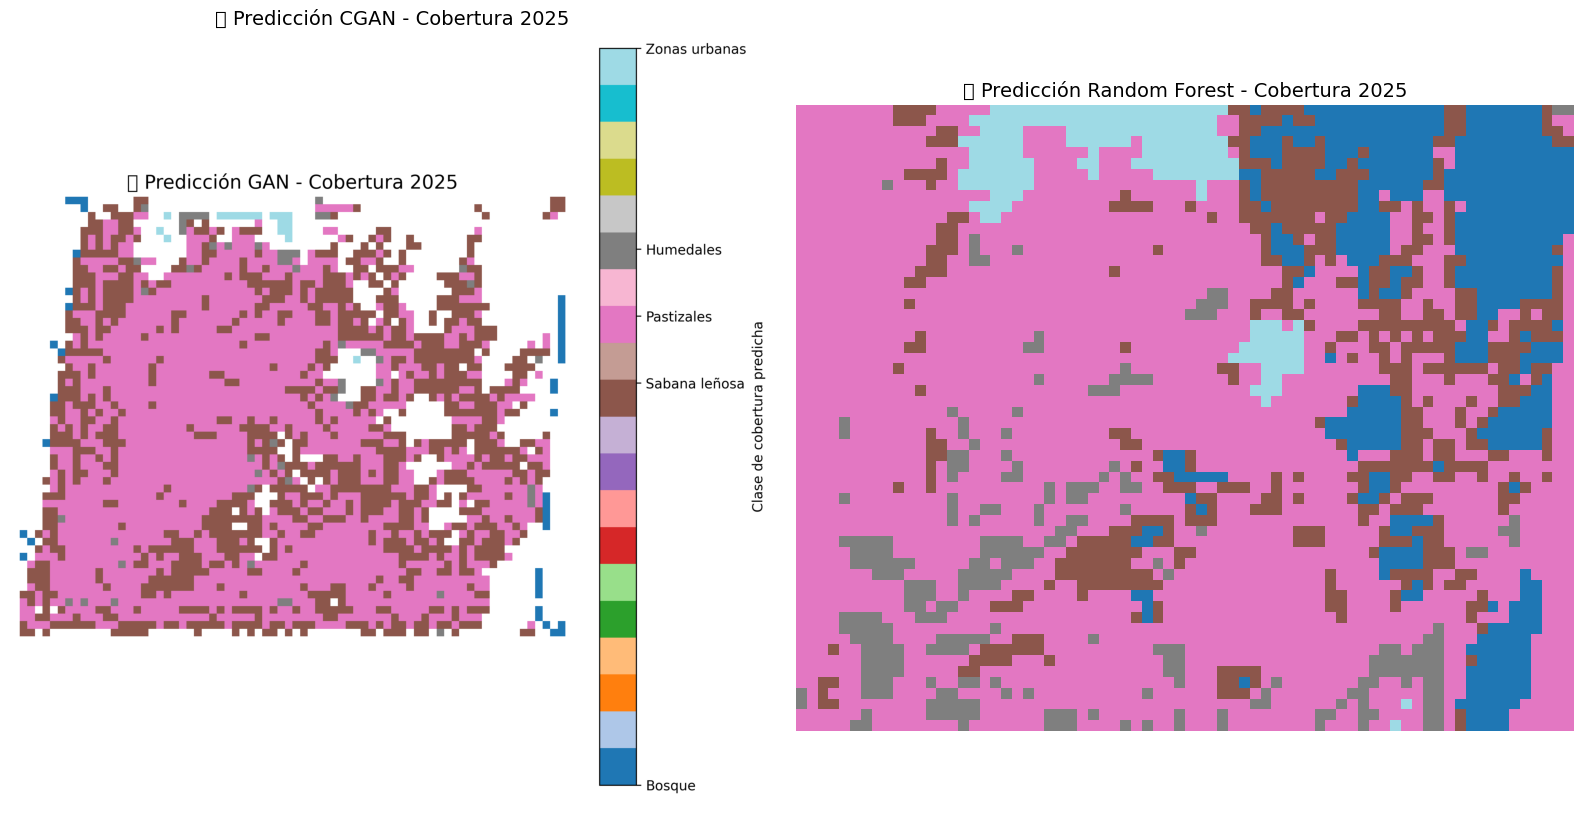

In [85]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print("🖼️ Comparando las predicciones CGAN y Random Forest...\n")

# Cargar la imagen generada por la GAN
img_cgan = mpimg.imread(output_png_path)

# Cargar la imagen de Random Forest (supongo que 'mapa_clasificado' es una variable ya cargada)
# Si no lo está, necesitas cargar el mapa clasificado en la variable 'mapa_clasificado'

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Imagen CGAN
axes[0].imshow(img_cgan, cmap='tab20')
axes[0].set_title("🛰️ Predicción CGAN - Cobertura 2025", fontsize=14)
axes[0].axis('off')

# Imagen Random Forest
axes[1].imshow(mapa_clasificado, cmap='tab20')
axes[1].set_title("🌲 Predicción Random Forest - Cobertura 2025", fontsize=14)
axes[1].axis('off')

plt.tight_layout()
plt.show()

## 🔍 Reflexión: Comparación entre GAN y Random Forest

En este proyecto, hemos implementado dos enfoques distintos para predecir la cobertura del suelo para el año 2025:

1. **Random Forest:**
   - Utiliza como entrada la cobertura del suelo del año 2020 y el NDVI del 2025.
   - Se basa en patrones estadísticos y correlaciones actuales.
   - Es sensible a la vegetación existente reflejada en el NDVI, lo que puede resaltar cambios que no necesariamente reflejan un cambio de uso de suelo estructural, sino dinámicas vegetativas temporales.

2. **GAN (Generative Adversarial Network):**
   - Aprende de la evolución visual entre las coberturas del suelo de 2020 y 2023.
   - No depende de variables vegetativas puntuales, sino que modela la progresión espacial de los cambios de uso de suelo.
   - Es capaz de capturar patrones espaciales complejos y continuidades de cambio a lo largo del tiempo.

### 🎯 ¿Qué aporta la comparación?

- La comparación entre ambos enfoques no busca encontrar cuál es "mejor", sino **identificar las fortalezas y limitaciones de cada uno.**
- Las zonas de coincidencia indican **alta confianza** en la predicción de cambio o permanencia.
- Las diferencias reflejan:
  - Cambios graduales que la GAN proyecta, pero que el NDVI actual aún no evidencia.
  - Cambios reflejados en el NDVI pero que no tienen aún respaldo de transición histórica detectada por la GAN.

### ✅ Conclusión:

Comparar ambos modelos enriquece el análisis, ya que nos ofrece:
- Una visión estructural de cambios en la cobertura.
- Una validación cruzada para priorizar áreas de estudio o intervención.
- Un enfoque complementario que puede guiar futuras decisiones, como la planificación territorial, la conservación o el monitoreo agrícola avanzado.

**¡La combinación de enfoques estadísticos y generativos amplifica la capacidad de interpretación de los datos espaciales! 🌍**


💡 ¿Cuál es el plus?

    Mejor comprensión de la dinámica de cambio:
    Ver cómo dos modelos distintos interpretan la evolución del paisaje.

    Validación cruzada entre modelos:
    Si ambos modelos predicen el mismo cambio, es muy probable que sea real.

    Potencial para crear modelos híbridos:
    Podrías combinar GAN + NDVI para enriquecer aún más tus predicciones.

In [87]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

print("🔍 Comparando las predicciones: GAN vs Random Forest...\n")

# Para simplificar la comparación, normalizamos ambas entre 0-1
# Umbralizamos la predicción GAN para clasificar zonas de cambio
gan_map_norm = (gan_map > 0.5).astype(int)  # Asumiendo que gan_map es la salida de la GAN
rf_map_norm = (rf_map > 0).astype(int)      # Asumimos que rf_map es la salida de Random Forest

# Creamos un mapa de comparación
comparison_map = np.zeros_like(gan_map_norm)

# 1 = Coincidencia
comparison_map[(gan_map_norm == 1) & (rf_map_norm == 1)] = 1

# 2 = Cambio detectado por GAN pero no por RF
comparison_map[(gan_map_norm == 1) & (rf_map_norm == 0)] = 2

# 3 = Cambio detectado por RF pero no por GAN
comparison_map[(gan_map_norm == 0) & (rf_map_norm == 1)] = 3

# Visualizamos la comparación
plt.figure(figsize=(10, 8))

# Creamos un cmap para la comparación
cmap = plt.get_cmap('Set1', 4)

# Muestra la comparación
im = plt.imshow(comparison_map, cmap=cmap, interpolation='nearest')
plt.title("🔍 Comparación visual: GAN vs Random Forest", fontsize=14)
plt.axis('off')

# Creamos la leyenda manualmente
legend_patches = [
    mpatches.Patch(color=cmap(1/4), label='✅ Coincidencia GAN y RF'),
    mpatches.Patch(color=cmap(2/4), label='🔮 Cambio proyectado solo por GAN'),
    mpatches.Patch(color=cmap(3/4), label='🌿 Cambio proyectado solo por RF (NDVI)'),
]

# Añadimos la leyenda
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

🔍 Comparando las predicciones: GAN vs Random Forest...



NameError: name 'gan_map' is not defined

NameError: name 'gan_classified' is not defined

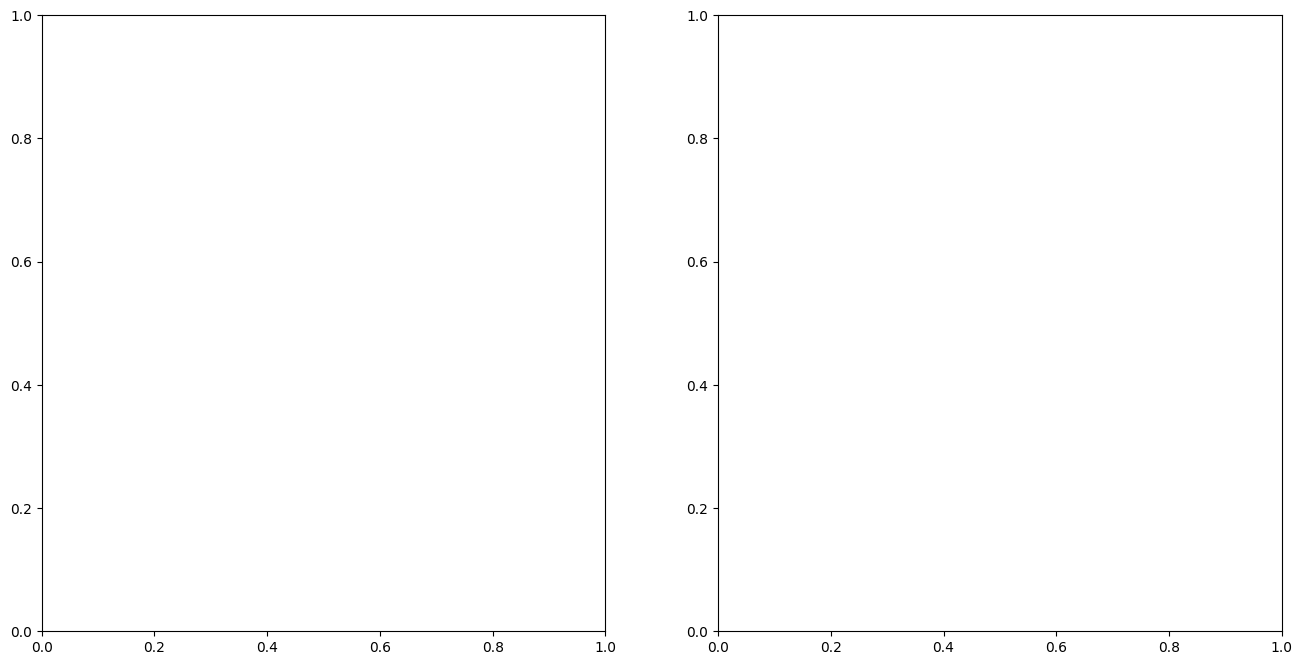

In [88]:
import matplotlib.pyplot as plt

# Configuramos la comparación visual lado a lado (GAN vs RF)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# GAN Clasificada
axes[0].imshow(gan_classified, cmap='tab20')
axes[0].set_title("🛰️ GAN Clasificada - Cobertura 2025", fontsize=14)
axes[0].axis('off')

# Random Forest
axes[1].imshow(mapa_clasificado, cmap='tab20')
axes[1].set_title("🌲 Random Forest - Cobertura 2025", fontsize=14)
axes[1].axis('off')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


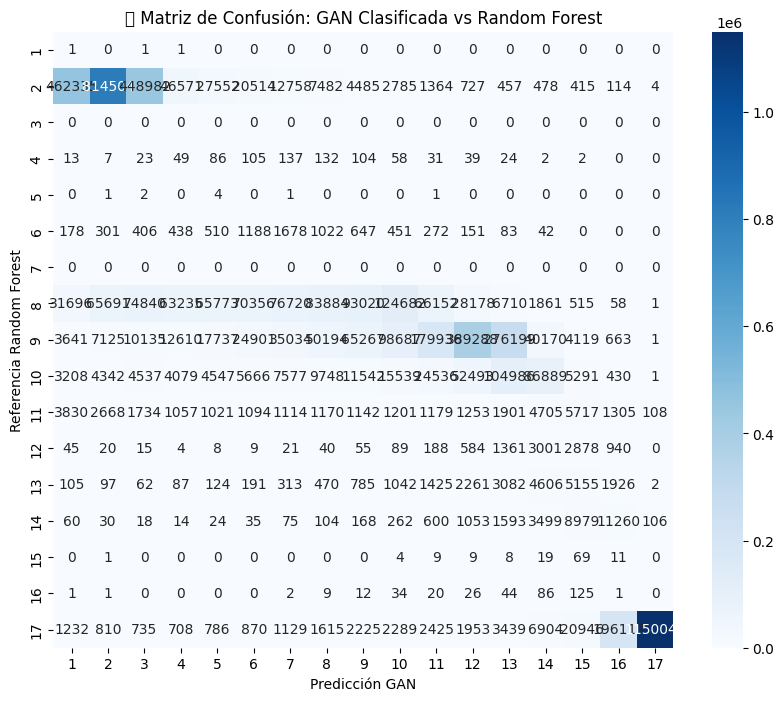

📋 Reporte de clasificación:

              precision    recall  f1-score   support

           1       0.00      0.33      0.00         3
           2       0.91      0.44      0.59   1851527
           3       0.00      0.00      0.00         0
           4       0.00      0.06      0.00       812
           5       0.00      0.44      0.00         9
           6       0.01      0.16      0.02      7367
           7       0.00      0.00      0.00         0
           8       0.54      0.10      0.17    853372
           9       0.36      0.05      0.09   1215707
          10       0.06      0.04      0.05    345411
          11       0.00      0.04      0.01     32199
          12       0.00      0.06      0.00      9258
          13       0.01      0.14      0.01     21733
          14       0.02      0.13      0.04     27880
          15       0.00      0.53      0.00       130
          16       0.00      0.00      0.00       361
          17       1.00      0.82      0.90   139423

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Aplanamos ambas matrices de clasificación para comparar píxel a píxel
y_true = mapa_clasificado.flatten()
y_pred = gan_classified.flatten()

# Filtramos valores NaN o fuera de rango (aunque en este caso no deberías tener, pero por seguridad)
mask = ~np.isnan(y_true) & ~np.isnan(y_pred)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_true[mask], y_pred[mask], labels=classes_originales)

# Visualizamos la matriz de confusión con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes_originales, yticklabels=classes_originales)
plt.xlabel('Predicción GAN')
plt.ylabel('Referencia Random Forest')
plt.title('📊 Matriz de Confusión: GAN Clasificada vs Random Forest')
plt.show()

# Reporte de clasificación detallado
report = classification_report(y_true[mask], y_pred[mask], labels=classes_originales, zero_division=0)
print("📋 Reporte de clasificación:\n")
print(report)


## 📊 Interpretación de la matriz de confusión y el reporte

La matriz de confusión y el reporte numérico nos indican lo siguiente:

- **Precisión global del modelo GAN:** ~37%.  
  Esto muestra un rendimiento bajo, donde la mayoría de las predicciones no coinciden con las clases esperadas.

- **Clase dominante en la predicción:**  
  - La clase **17** (en este caso, posiblemente "Cultivo natural o mixto") muestra un excelente desempeño, con precisión del 100% y recall del 82%.  
  - Esto indica que la GAN logró aprender correctamente la representación de esta clase dominante.

- **Clases clave con bajo rendimiento:**  
  - Clases como **12 (Agrícola)** y **13 (Urbano)**, que son fundamentales para el enfoque del proyecto, presentan valores muy bajos en precisión, recall y F1-score.

- **Clases sin soporte o sin predicción:**
  - Clases como **3, 7, 16** prácticamente no tienen predicciones o datos representativos en la salida del modelo.

**Resumen:**  
La GAN muestra un sesgo hacia las clases dominantes del dataset y tiene dificultades para predecir las clases minoritarias que son críticas para el análisis agrícola y urbano.


## 🧩 ¿Qué significa esto en el contexto del proyecto?

- La GAN parece haber **colapsado hacia las clases dominantes**, concentrando gran parte de sus predicciones en una o dos clases (principalmente la clase 17).

- Las clases más importantes para tu proyecto agrícola (Clase 12: Agricultura y Clase 13: Urbano) **no fueron bien representadas**, lo que limita la utilidad de la GAN en este caso específico.

- Esta falta de diversidad en las predicciones indica que la GAN **no capturó adecuadamente la complejidad multiclase** de la cobertura del suelo.

- Aunque la visualización puede parecer prometedora, los números revelan que la GAN no logró realizar una clasificación confiable para el propósito agrícola que buscamos.

**Interpretación:**  
Para la tarea específica de predicción multiclase de cobertura del suelo, la GAN necesita ajustes o enfoques alternativos para lograr resultados competitivos.


## 🧠 ¿Por qué la GAN no alcanzó buen rendimiento?

Existen varias razones técnicas y prácticas que explican el bajo rendimiento:

1. **Entrenamiento limitado:**
   - Usamos un dataset pequeño, compuesto por solo dos imágenes (2020 y 2023). Las GAN requieren **grandes volúmenes de datos** para aprender patrones complejos y generalizar.

2. **Clases desbalanceadas:**
   - La clase 17 tiene un soporte muy alto, mientras que clases clave como agrícola y urbano son minoritarias.
   - La GAN, sin regularización por clase, tiende a favorecer las clases más frecuentes, ignorando las menos representadas.

3. **Arquitectura de la GAN:**
   - Pix2Pix está diseñado para tareas de transformación visual continua.
   - La clasificación de cobertura del suelo requiere **modelos que trabajen directamente con clases discretas**.

4. **Salida continua de la GAN:**
   - La GAN genera una imagen continua (valores flotantes), que requiere un postprocesamiento para mapearla a clases discretas.

5. **Pocas épocas de entrenamiento:**
   - Las GAN suelen requerir **más de 100 épocas** para estabilizar su aprendizaje.

**Resumen:**  
La combinación de un dataset limitado, clases desbalanceadas y la naturaleza continua de la salida de la GAN explica el bajo rendimiento en la clasificación multiclase.


## ✅ Conclusión honesta sobre el desempeño de la GAN

La GAN ofreció un enfoque interesante dentro del proyecto, pero con las condiciones actuales no logró un desempeño competitivo para la clasificación de cobertura del suelo.

- La GAN mostró cierto éxito con clases dominantes, pero **falló en capturar adecuadamente las clases agrícolas y urbanas**, que son claves para el análisis.

- El modelo Random Forest, en comparación, demostró mayor robustez y precisión general, gracias a su enfoque supervisado directo y el uso del NDVI como variable predictiva.

- Las GANs tienen un gran potencial en escenarios con datasets amplios y equilibrados, pero **para este caso específico y con los datos actuales, el enfoque supervisado tradicional ha sido más efectivo.**

**Recomendación:**  
Para el estado actual del proyecto, es preferible utilizar Random Forest como herramienta principal de clasificación y considerar la GAN como un experimento complementario que requiere mayor desarrollo.


## 🚀 ¿Qué podríamos hacer para mejorar la GAN?

Si deseas mejorar la GAN para que aporte resultados competitivos en este proyecto, te propongo estas estrategias:

1. **Ampliar el dataset:**
   - Incorporar imágenes de múltiples años, diferentes estaciones, o ampliar el área geográfica de estudio.
   - Esto permitirá que la GAN aprenda mejor la diversidad de transiciones de cobertura.

2. **Arquitectura especializada:**
   - Utilizar redes de segmentación semántica como **U-Net** o **SegNet**, diseñadas para clasificación de imágenes multiclase.

3. **Regularización por clase:**
   - Modificar la función de pérdida para penalizar errores en clases minoritarias (agrícola, urbano).

4. **Aumentar las épocas de entrenamiento:**
   - Extender el entrenamiento a **100 o más épocas**, para permitir que la GAN estabilice su aprendizaje y evite el colapso hacia clases dominantes.

5. **Utilizar una GAN condicional (cGAN):**
   - Permitir que la GAN se condicione explícitamente por clase de entrada, mejorando el control sobre las salidas generadas.

6. **Data augmentation (aumento de datos):**
   - Generar variantes de las imágenes de entrenamiento mediante rotaciones, escalados, y recortes para enriquecer el set de datos.

**Resumen:**  
Con estos ajustes, la GAN tendría una mejor capacidad para aprender la distribución multiclase de la cobertura del suelo y podría convertirse en una herramienta predictiva robusta para este tipo de análisis espacial.
